In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv("Day 19_E-Commerce_Data.csv")  # Replace with the actual file path

In [3]:
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [5]:
# Display basic info
print(df.info())

# Count missing values in each column
missing_values = df.isna().sum()

# Compute percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display missing values percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
                  Missing Values  Percentage
Order_ID                       0    0.000000
Product_Category              24    4.752475
Product_Price                 20    3.960396
Customer_Age                  15    2.970297
Rating                        25    4.950495
Review_Text                   21    4.158416
Order_Date                    10    1.980198


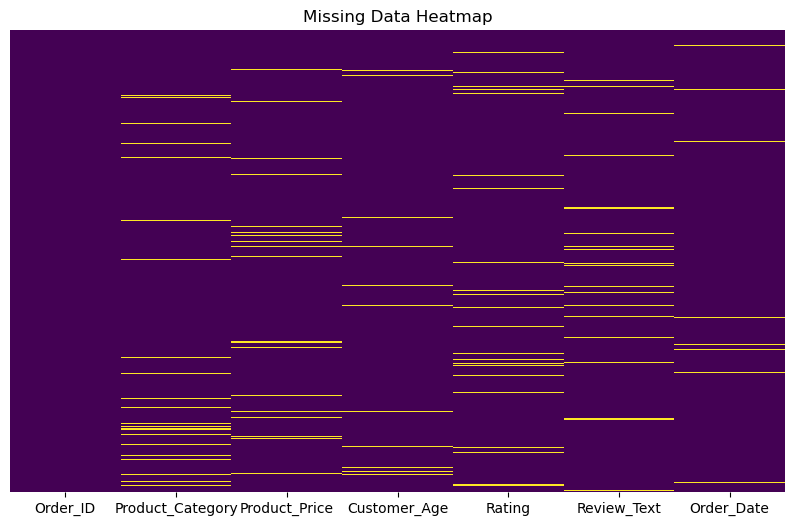

In [7]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [13]:
df['Product_Price'] = df['Product_Price'].fillna(df['Product_Price'].mean())


In [17]:
df['Product_Category'] = df['Product_Category'].fillna(df['Product_Category'].mode()[0])


In [19]:
df['Product_Price']

0      3262.0
1       214.0
2      3429.0
3      4568.0
4      2237.0
        ...  
500    2965.0
501     384.0
502    2434.0
503    3093.0
504    1970.0
Name: Product_Price, Length: 505, dtype: float64

In [21]:
df['Product_Category']

0         Clothing
1         Clothing
2       Home Decor
3            Books
4      Electronics
          ...     
500     Home Decor
501     Home Decor
502    Electronics
503     Home Decor
504    Electronics
Name: Product_Category, Length: 505, dtype: object

In [25]:
df['Order_Date'] = df['Order_Date'].ffill()  # Forward fill


In [27]:
df['Order_Date']

0      2023-01-01
1      2023-01-02
2      2023-01-03
3      2023-01-04
4      2023-01-05
          ...    
500    2023-02-15
501    2023-04-19
502    2023-02-21
503    2023-10-08
504    2024-04-05
Name: Order_Date, Length: 505, dtype: object

In [29]:
# Selecting numerical columns for KNN imputation
num_cols = df.select_dtypes(include=[np.number]).columns

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [31]:
# Before imputation (original summary)
print("Before Imputation:")
print(df.describe())

# After imputation (new summary)
print("\nAfter Imputation:")
print(df.describe())


Before Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000    3588.000000     54.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000

After Imputation:
         Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    505.000000  505.000000
mean   249.899010    2442.748515     42.194455    3.202772
std    144.769438    1387.499472     14.721617    1.122317
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.400000
50%    250.000000    2464.000000     41.000000    3.000000
75%    375.000000 

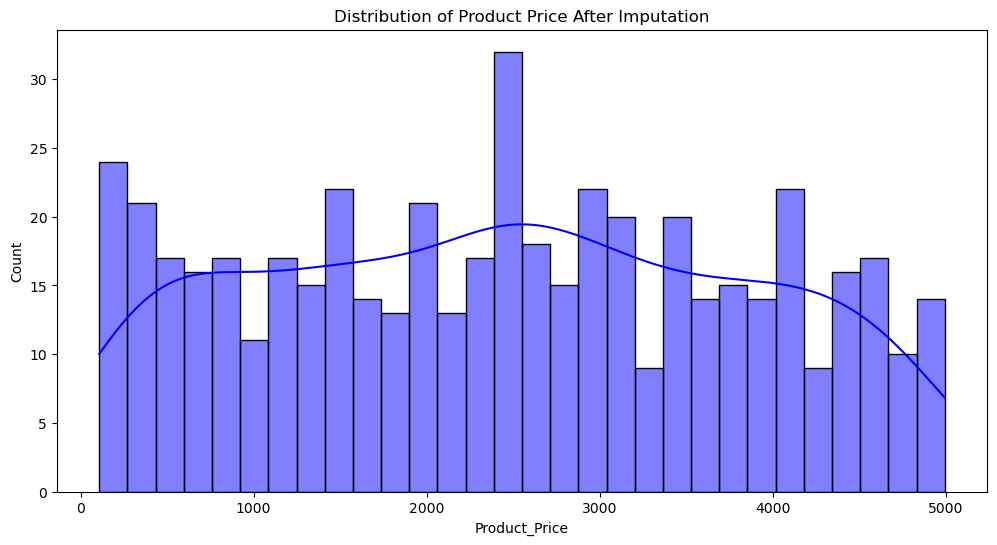

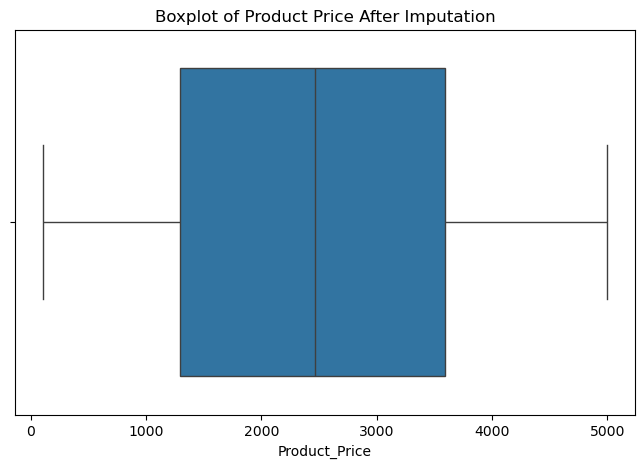

In [33]:
# Histogram comparison
plt.figure(figsize=(12, 6))
sns.histplot(df['Product_Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Product Price After Imputation")
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Product_Price'])
plt.title("Boxplot of Product Price After Imputation")
plt.show()


In [35]:
df.to_csv("cleaned_ecommerce_orders.csv", index=False)


In [37]:
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1.0,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2.0,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3.0,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4.0,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5.0,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46.0,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109.0,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52.0,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281.0,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08
